In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [51]:
x1 = np.random.randn(500)
x2 = np.random.randn(500)
y = 1 * (x1**2 - x2**2 > 0.2)
X = pd.DataFrame(np.c_[x1,x2], columns=['X1', 'X2'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

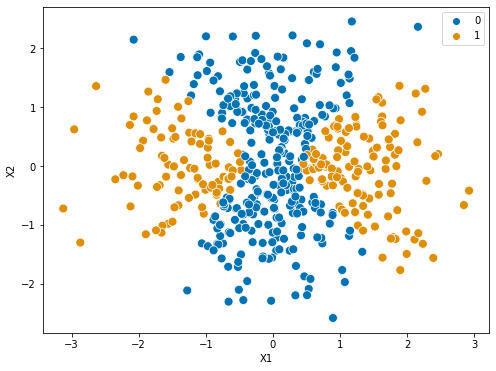

In [52]:
plt.figure(figsize=(8,6))
sb.scatterplot(X['X1'], X['X2'], s=80, hue=y, palette='colorblind')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [53]:
def plot_clf(model, X1, X2, y, h=0.01, pad=0.25, poly=0):
    x_min, x_max = X1.min()-pad, X1.max()+pad
    y_min, y_max = X2.min()-pad, X2.max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    XX = np.c_[xx.ravel(), yy.ravel()]
    if poly != 0:
        XX = PolynomialFeatures(poly).fit_transform(XX)
    Z = model.predict(XX)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    sb.scatterplot(X1, X2, s=70, hue=y, palette="colorblind")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

Test Accuracy: 0.7000


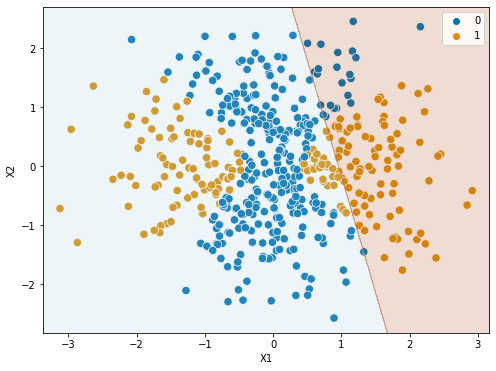

In [77]:
logis_clf = LogisticRegression()
logis_clf.fit(X_train, y_train)
print('Test Accuracy: {:.4f}'.format(logis_clf.score(X_test, y_test)))
plot_clf(logis_clf, X['X1'], X['X2'], y, h=0.01, pad=0.25)

In [55]:
X_poly = PolynomialFeatures(2).fit_transform(X)
X_poly_train, X_poly_test = train_test_split(X_poly, train_size=0.5, random_state=1)

Test Accuracy: 0.9640


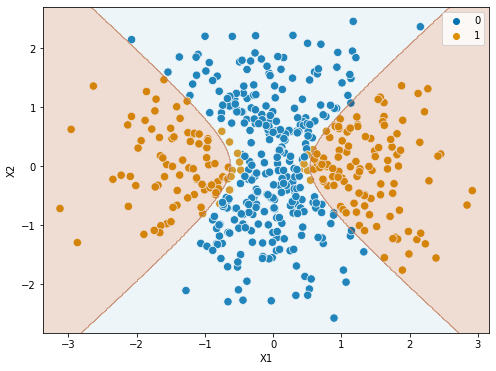

In [76]:
logis_clf_poly = LogisticRegression()
logis_clf_poly.fit(X_poly_train, y_train)
print('Test Accuracy: {:.4f}'.format(logis_clf_poly.score(X_poly_test, y_test)))
plot_clf(logis_clf_poly, X['X1'], X['X2'], y, h=0.01, pad=0.25, poly=2)

In [60]:
def plot_svc(svc, X1, X2, y, h=0.01, pad=0.25, support_point=True):
    x_min, x_max = X1.min()-pad, X1.max()+pad
    y_min, y_max = X2.min()-pad, X2.max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    sb.scatterplot(X1, X2, s=70, hue=y, palette="colorblind")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    # Support vectors indicated in plot by vertical lines
    if support_point==True:
        sv = svc.support_vectors_
        plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=30, linewidths='0.1')
        print('Number of support vectors: {}'.format(svc.support_.size))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

Test Accuracy: 0.7160
Number of support vectors: 208


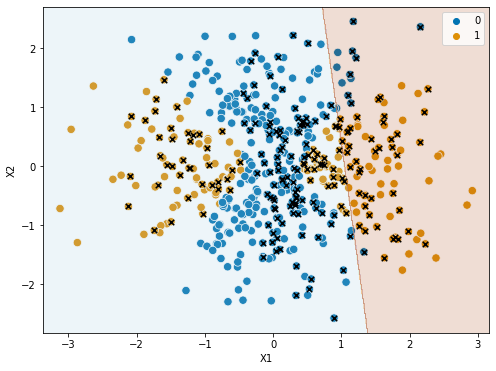

In [82]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
print('Test Accuracy: {:.4f}'.format(svm.score(X_test, y_test)))
plot_svc(svm, X['X1'], X['X2'], y)

Test Accuracy: 0.9520
Number of support vectors: 75


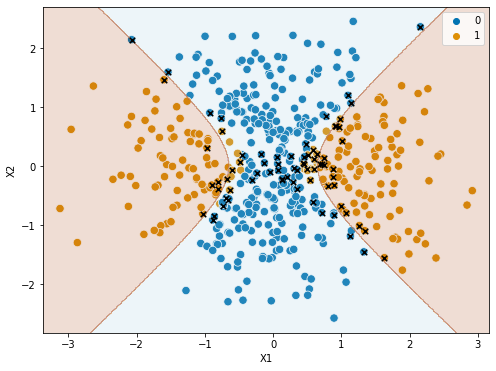

In [74]:
svm = SVC(kernel='poly', degree=2)
svm.fit(X_train, y_train)
print('Test Accuracy: {:.4f}'.format(svm.score(X_test, y_test)))
plot_svc(svm, X['X1'], X['X2'], y)

Test Accuracy: 0.9600
Number of support vectors: 89


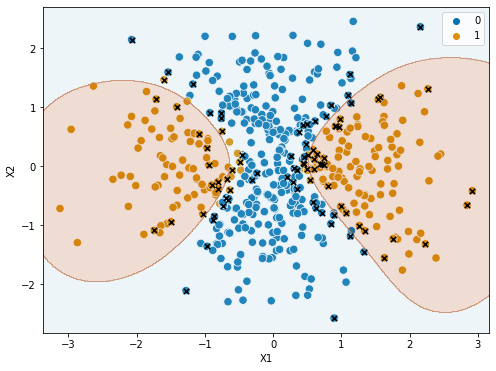

In [83]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
print('Test Accuracy: {:.4f}'.format(svm.score(X_test, y_test)))
plot_svc(svm, X['X1'], X['X2'], y)

In [86]:
def display_roc(model, X_train, X_test, y_train, y_test, label, type='train'):

    model.fit(X_train, y_train)
    y_train_pred = model.decision_function(X_train)
    y_test_pred = model.decision_function(X_test)

    false_pos_train, true_pos_train, threshold_train = roc_curve(y_train, y_train_pred)
    false_pos_test, true_pos_test, threshold_test = roc_curve(y_test, y_test_pred)

    auc_train = auc(false_pos_train, true_pos_train)
    auc_test = auc(false_pos_test, true_pos_test)

    if type=='train':
        plt.plot(false_pos_train, true_pos_train, label = label + ' (AUC = {:.2f})'.format(auc_train))
    else:
        plt.plot(false_pos_test, true_pos_test, label = label + ' (AUC = {:.2f})'.format(auc_test))

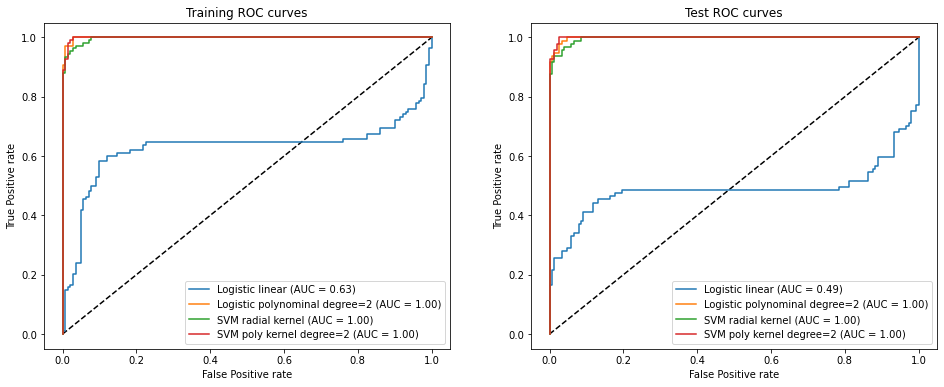

In [88]:
logis = LogisticRegression()
logis_poly = LogisticRegression()
svm1 = SVC(kernel='rbf')
svm2 = SVC(kernel='poly', degree=2)

plt.figure(figsize=(16,6))

plot_1 = plt.subplot(1,2,1)
plt.plot(np.linspace(0,1), np.linspace(0,1), '--', c='k')
display_roc(logis, X_train, X_test, y_train, y_test, 'Logistic linear', type='train')
display_roc(logis_poly, X_poly_train, X_poly_test, y_train, y_test, 'Logistic polynominal degree=2', type='train')
display_roc(svm1, X_train, X_test, y_train, y_test, 'SVM radial kernel', type='train')
display_roc(svm2, X_train, X_test, y_train, y_test, 'SVM poly kernel degree=2', type='train')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Training ROC curves')
plt.legend()

plot_2 = plt.subplot(1,2,2)
plt.plot(np.linspace(0,1), np.linspace(0,1), '--', c='k')
display_roc(logis, X_train, X_test, y_train, y_test, 'Logistic linear', type='test')
display_roc(logis_poly, X_poly_train, X_poly_test, y_train, y_test, 'Logistic polynominal degree=2', type='test')
display_roc(svm1, X_train, X_test, y_train, y_test, 'SVM radial kernel', type='test')
display_roc(svm2, X_train, X_test, y_train, y_test, 'SVM poly kernel degree=2', type='test')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Test ROC curves')
plt.legend()

plt.show()